In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

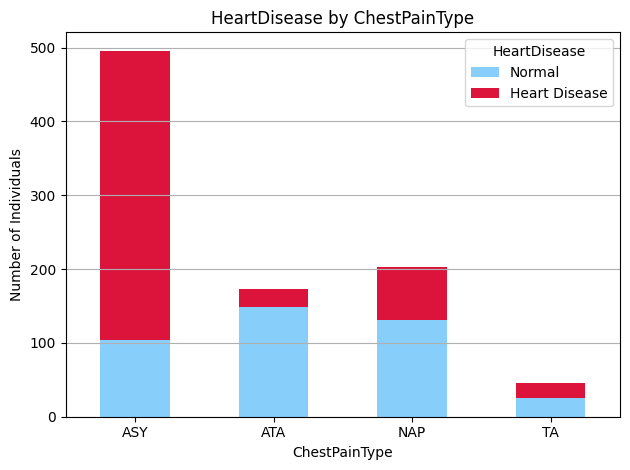

In [10]:
Heart_D_counts = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
Heart_D_counts.plot(kind='bar', stacked=True, color=[ 'lightskyblue','crimson'])
plt.title('HeartDisease by ChestPainType')
plt.xlabel('ChestPainType')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease', labels=['Normal', 'Heart Disease'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

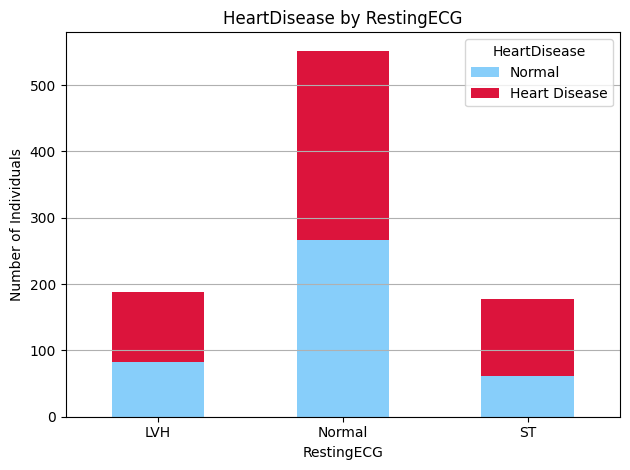

In [11]:
Heart_D_counts = data.groupby(['RestingECG', 'HeartDisease']).size().unstack()
Heart_D_counts.plot(kind='bar', stacked=True, color=['lightskyblue','crimson'])
plt.title('HeartDisease by RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease', labels=['Normal', 'Heart Disease'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

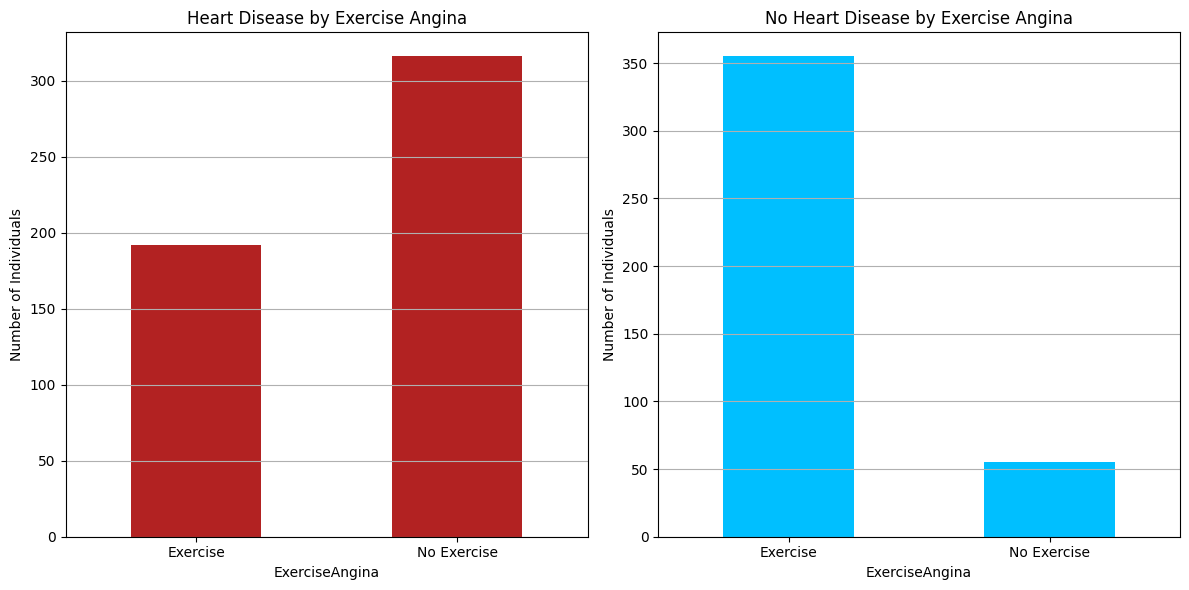

In [12]:
Heart_D_counts = data.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for individuals with 1(Heart Disease)
Heart_D_counts.get(1, pd.Series()).plot(kind='bar', stacked=True, ax=axes[0], color='firebrick')
axes[0].set_title('Heart Disease by Exercise Angina')
axes[0].set_ylabel('Number of Individuals')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Exercise', 'No Exercise'], rotation=0)
axes[0].grid(axis='y')

# Plot for individuals with 0 (No Heart Disease)
Heart_D_counts.get(0, pd.Series()).plot(kind='bar', stacked=True, ax=axes[1], color='deepskyblue')
axes[1].set_title('No Heart Disease by Exercise Angina')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Exercise', 'No Exercise'], rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

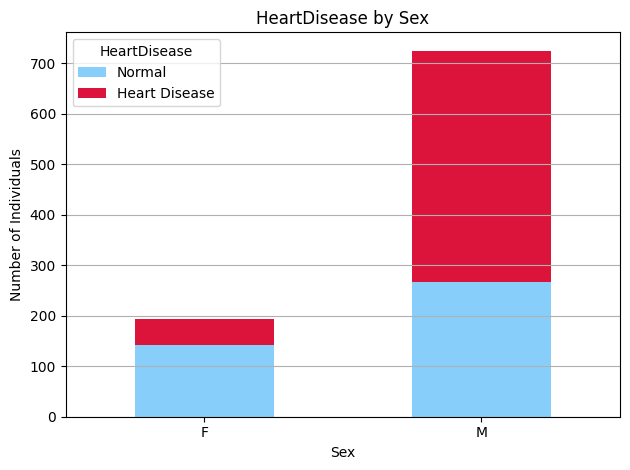

In [13]:
Heart_D_counts = data.groupby(['Sex', 'HeartDisease']).size().unstack()
Heart_D_counts.plot(kind='bar', stacked=True, color=['lightskyblue','crimson'])
plt.title('HeartDisease by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease', labels=['Normal', 'Heart Disease'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

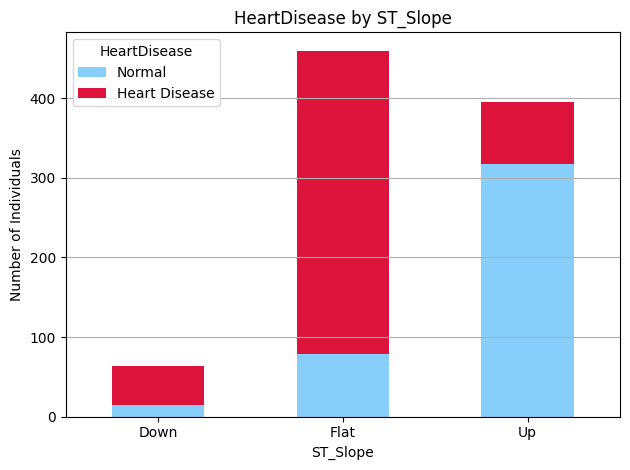

In [14]:
Heart_D_counts = data.groupby(['ST_Slope', 'HeartDisease']).size().unstack()
Heart_D_counts.plot(kind='bar', stacked=True, color=[ 'lightskyblue','crimson'])
plt.title('HeartDisease by ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease', labels=['Normal', 'Heart Disease'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()